Chapter 19
# 将成对距离矩阵转化为完全图，设定阈值
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 12个坐标点
points = np.array([[1,6],[4,6],[1,5],[6,0],
                   [3,8],[8,3],[4,1],[3,5],
                   [9,2],[5,9],[4,9],[8,4]])

In [3]:
# 计算成对距离矩阵
D = np.linalg.norm(points[:, np.newaxis, :] - points, axis=2)

In [4]:
# 设定阈值
threshold = 6
D_threshold = D
D_threshold[D_threshold > threshold] = 0
# 超过阈值置零

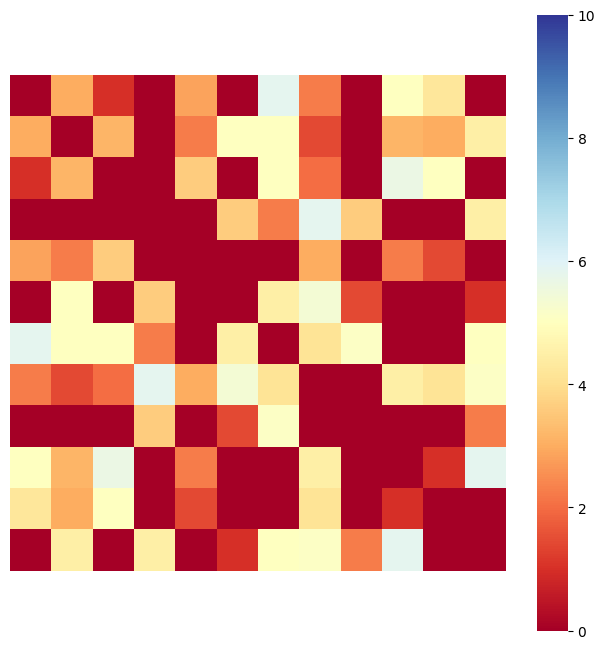

In [5]:
# 可视化成对距离矩阵
plt.figure(figsize=(8,8))
sns.heatmap(D_threshold, square = True, 
            cmap = 'RdYlBu', vmin = 0, vmax = 10,
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
plt.savefig('成对距离矩阵_heatmap, 设定阈值.svg')

In [6]:
# 创建无向图
G_threshold = nx.Graph(D_threshold, nodetype=int)
# 用邻接矩阵创建无向图

# 添加节点和边
for i in range(12):
    G_threshold.add_node(i, pos=(points[i, 0], points[i, 1]))  

# 取出节点位置
pos = nx.get_node_attributes(G_threshold, 'pos')

# 增加节点属性
node_labels = {i: chr(ord('a') + i) for i in range(len(G_threshold.nodes))} 
edge_weights = [G_threshold[i][j]['weight'] for i, j in G_threshold.edges]

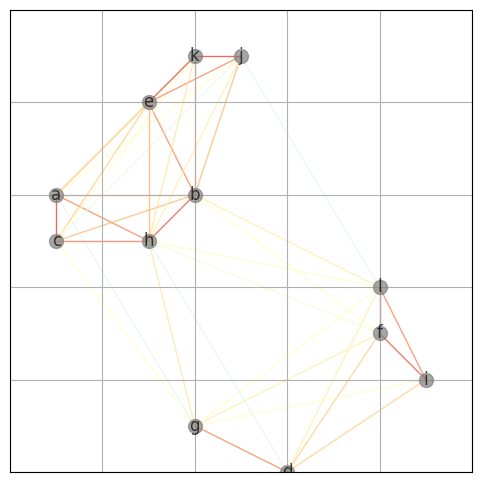

In [7]:
# 可视化图
fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G_threshold, pos, 
                 with_labels=True, 
                 labels=node_labels, 
                 node_size=100, 
                 edge_vmin = 0, edge_vmax = 10,
                 node_color='grey', 
                 font_color='black', 
                 edge_color=edge_weights,
                 edge_cmap=plt.cm.RdYlBu,
                 width=1, alpha=0.7)

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('成对距离矩阵_无向图_阈值.svg')
plt.show()
